In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
def x1(t):
    return np.cos(np.cos(t)*t*t+3*t-10)

In [3]:
def x2(t):
    return np.sin(-np.sin(t)*t*t+t)

In [4]:
def y(t):
    return np.sin(-np.sin(t)*t*t+t-2*np.pi)/3

In [5]:
t = np.arange(2.5, 5, 0.01)

<AxesSubplot:>

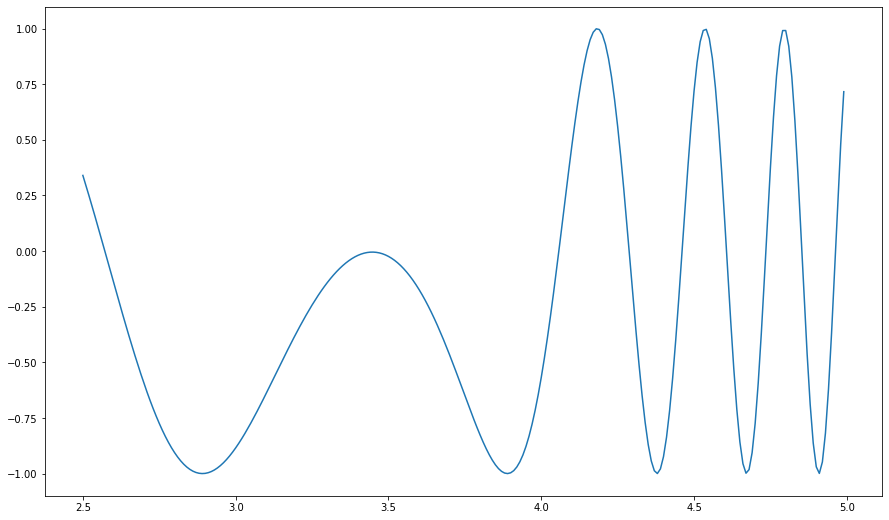

In [6]:
plt.figure(figsize=(15,9))
sns.lineplot(x=t, y=x1(t))

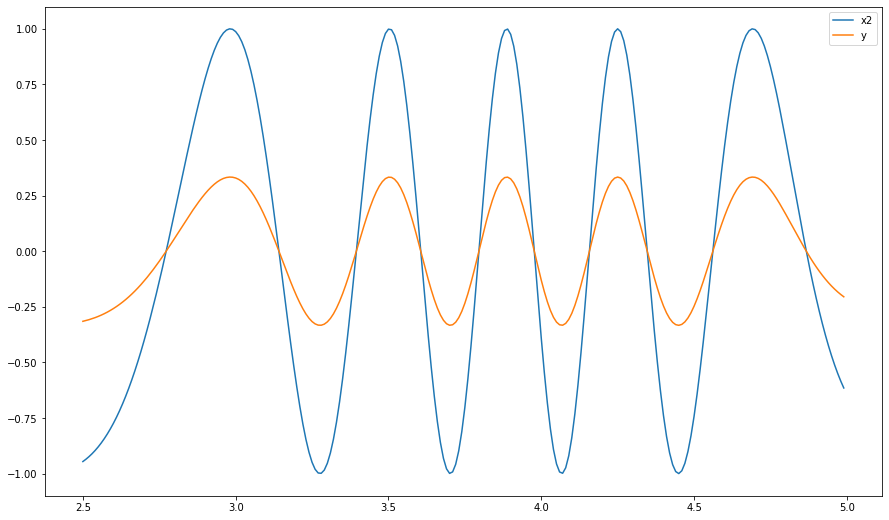

In [7]:
plt.figure(figsize=(15,9))
sns.lineplot(x=t, y=x2(t), label='x2')
sns.lineplot(x=t, y=y(t), label='y')
plt.legend()

In [8]:
class linear_layer:
    def __init__(self, lr):
        self.w = None
        self.lr = lr
        
    def fit(self, X, y, epochs=1):
        # смещение входит в веса
        X = np.column_stack([X, np.ones(X.shape[0])])
        n_sample, n_feature = X.shape
        output_nodes = y.shape[1]
        
        if self.w is None:
            self.w = np.random.randn(n_feature, output_nodes)
            
        for epoch in range(epochs):
            self.losses = []
            for i in range(n_sample):
                loss = y[i] - X[i].dot(self.w)
                self.w += self.lr * np.dot(X[i].reshape(-1,1), loss.reshape(-1,1))
                self.losses.append(loss)
                
        return self
    
    def predict(self, X):
        X = np.column_stack([X, np.ones(X.shape[0])])
        y_pred = X.dot(self.w)
        return y_pred
    
    def get_loss(self):
        return self.losses
    
    def get_weights(self):
        return self.w

In [9]:
class time_delay_layer:
    def __init__(self, D=1):
        self.D = D
        self.arr = np.zeros(D)
        
    def transform(self, X, Y=None):
        result_x = np.zeros((len(X) - self.D, self.D))
        for i in range(X.shape[0] - self.D):
            result_x[i] = X[i:i+self.D]
            
        if Y is None:
            result_y = X[self.D:]
        else:
            result_y = Y[self.D:]
            
        return result_x, result_y
    
    def init(self, values):
        self.arr = np.append(np.array([0]), np.array(values))
        
    def predict(self, X):
        X_ = np.append(self.arr[1:], X)
        result_x = np.zeros((len(X), self.D))
        
        for i in range(X_.shape[0] - self.D + 1):
            result_x[i] = X_[i:i+self.D]
        self.arr = X_[-self.D:]
        return result_x

In [10]:
class Network:
    def __init__(self, D=1, epochs=50, lr=0.01):
        self.D = D
        self.epochs = epochs
        self.tdl = time_delay_layer(D)
        self.lin = linear_layer(lr=lr)
        
    def fit(self, X, Y=None):
        X_, Y_ = self.tdl.transform(X, Y)
        Y_ = np.array(Y_).reshape(-1, 1)
        self.lin.fit(X_, Y_, epochs=self.epochs)
        
    def predict(self, X):
        res = self.tdl.predict(X)
        res = self.lin.predict(res).ravel()
        self.last_res = res[-1]
        return res

In [11]:
D=5
net = Network(D=D, lr=0.01)
X = x1(t)
net.fit(X)

In [12]:
X_init = X[:D-1]
X_test = X[D-1:-1]
X_res = X[D:]

In [13]:
net.tdl.init(X_init)
X_pred = net.predict(X_test)
X_pred.shape

(245,)

In [14]:
t[D:].shape

(245,)

<AxesSubplot:>

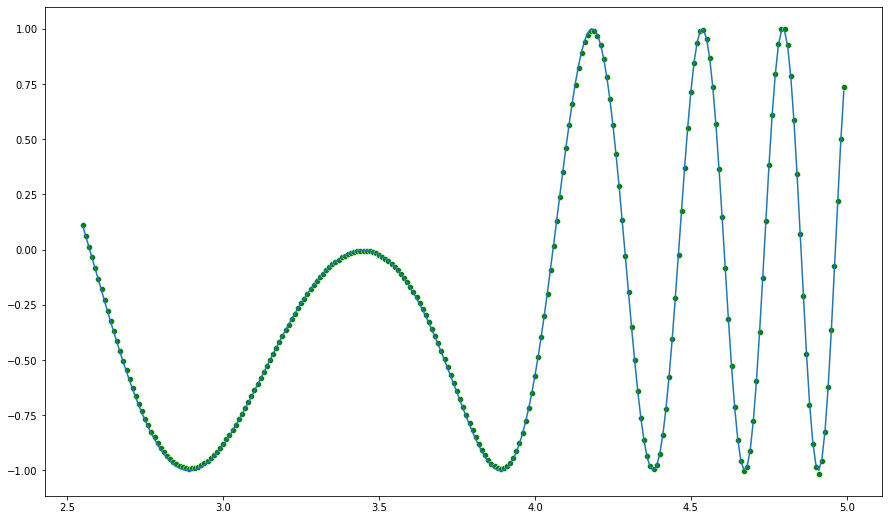

In [15]:
plt.figure(figsize=(15,9))
sns.lineplot(x=t[D:], y=X_res)
sns.scatterplot(x=t[D:], y=X_pred, color='g')

Text(0, 0.5, 'Error')

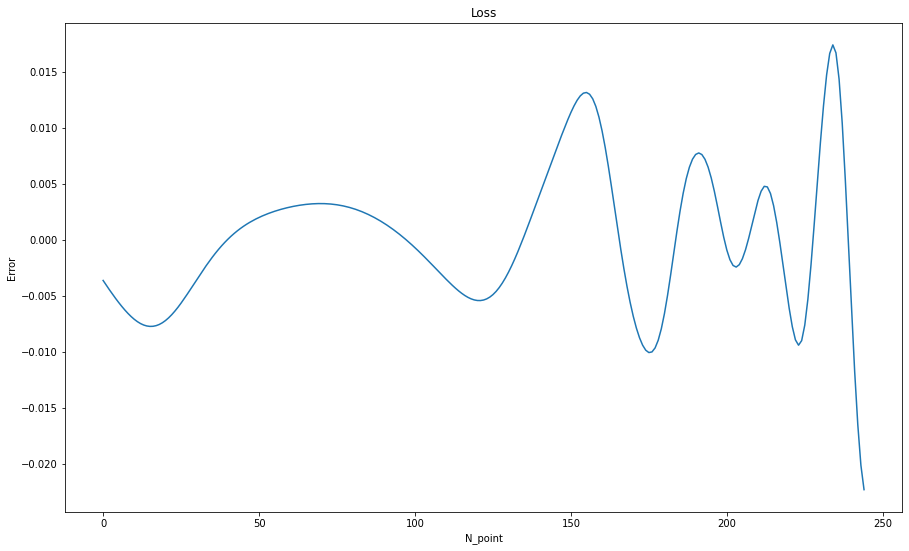

In [16]:
plt.figure(figsize=(15,9))
plt.plot(net.lin.get_loss())
plt.title('Loss')
plt.xlabel('N_point')
plt.ylabel('Error')

In [17]:
mean_squared_error(X_res, X_pred)

4.865877552751907e-05

In [18]:
D = 3
net = Network(D=D, epochs=500, lr=0.001)
X = x1(t)
net.fit(X)
X_init = X[:D-1]
X_test = X[D-1:-1]
X_res = X[D:]
net.tdl.init(X_init)
X_pred = net.predict(X_test)

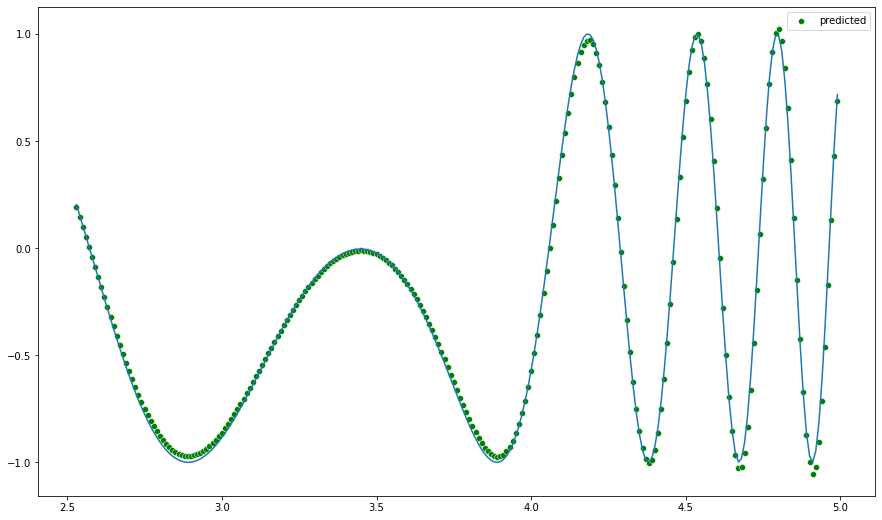

In [19]:
plt.figure(figsize=(15,9))
sns.lineplot(x=t[D:], y=X_res)
sns.scatterplot(x=t[D:], y=X_pred, color='g', label='predicted')
plt.legend()

Text(0, 0.5, 'Error')

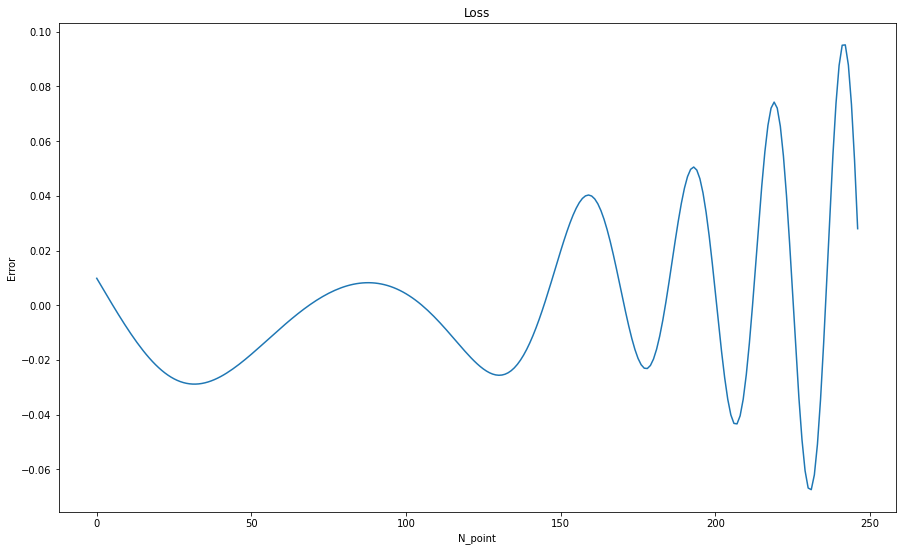

In [20]:
plt.figure(figsize=(15,9))
plt.plot(net.lin.get_loss())
plt.title('Loss')
plt.xlabel('N_point')
plt.ylabel('Error')

In [21]:
mean_squared_error(X_res, X_pred)

0.0008370501241001246

In [22]:
x_pred = []
for i in range(10):
    x_pred.append(net.predict(np.array([net.last_res]))[0])
    
x_pred

[0.8488664469918358,
 0.9560410474926837,
 1.0170171473502443,
 1.0344415252874888,
 1.0139508858002964,
 0.9606900546239977,
 0.8804637872377117,
 0.7789641664288984,
 0.6618401017703162,
 0.5344472990170421]

In [23]:
T_pred = np.arange(4.99, 4.99+0.01*10, 0.01)
T_pred = np.array(T_pred)
X__ans = x1(T_pred)
X__ans

array([ 0.71632433,  0.88937687,  0.9845361 ,  0.99233747,  0.91101859,
        0.74690057,  0.51402782,  0.23306838, -0.07045078, -0.36843038])

In [24]:
T_pred.shape

(10,)

In [25]:
len(x_pred)

10

<AxesSubplot:>

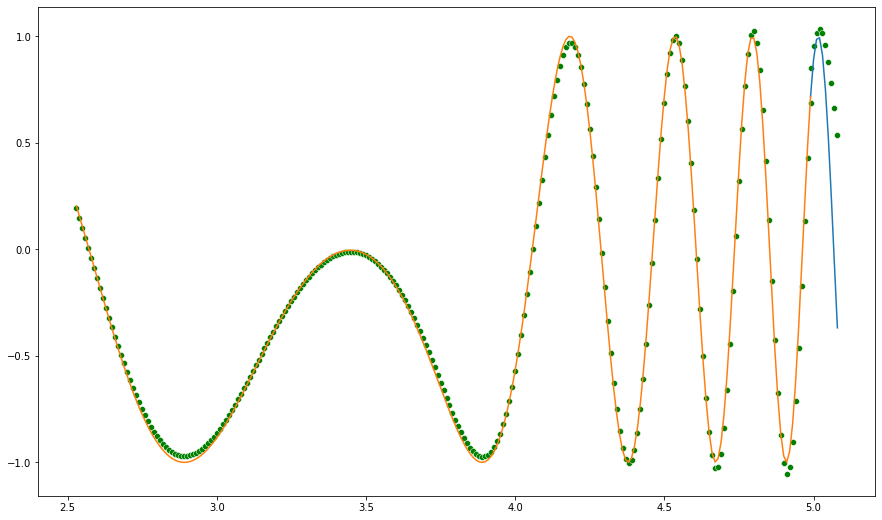

In [26]:
plt.figure(figsize=(15,9))
sns.lineplot(x=T_pred, y=X__ans)
sns.scatterplot(x=T_pred, y=x_pred, color='g')
sns.lineplot(x=t[D:], y=X_res)
sns.scatterplot(x=t[D:], y=X_pred, color='g')

In [27]:
mean_squared_error(X_res, X_pred)

0.0008370501241001246

In [28]:
X = x2(t)
Y = y(t)

In [29]:
D = 4
net = Network(D=D, lr=0.001, epochs=500)
net.fit(X, Y)

In [30]:
X_test = X[:-1]
X_ans = X[1:]
Y_ans = Y[1:]
Y_pred = net.predict(X_test)

In [31]:
Y_pred.shape

(249,)

In [32]:
Y_ans.shape

(249,)

In [33]:
t.shape

(250,)

<AxesSubplot:>

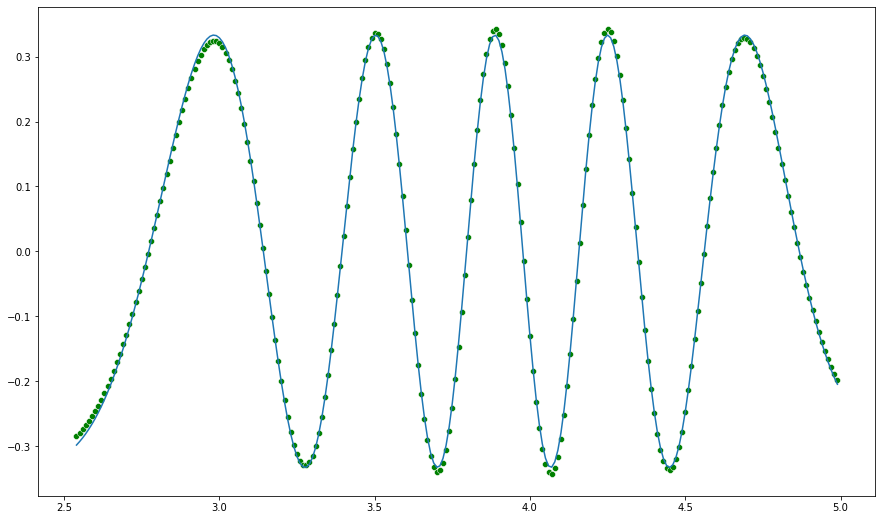

In [34]:
plt.figure(figsize=(15,9))
sns.lineplot(x=t[4:], y=Y_ans[3:])
sns.scatterplot(x=t[4:], y=Y_pred[3:], color='g')

In [35]:
mean_squared_error(Y_ans, Y_pred)

0.0002641578646457039

In [38]:
net.lin.get_weights()

array([[-2.56073790e-01],
       [ 2.45518923e-01],
       [-7.50404547e-02],
       [ 4.03512861e-01],
       [ 3.60340916e-04]])